In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [19]:
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.float32)

In [20]:
w = torch.tensor([1.0], dtype=torch.float32, requires_grad=True)

In [21]:
def forward(x):
    return w * x

In [22]:
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

In [23]:
optimizer = torch.optim.SGD([w], lr=0.01)
losses = []
for epoch in range(100):
    total_loss = 0
    for x, y in zip(x_data_tensor, y_data_tensor):
        l = loss(x, y)
        total_loss += l.item()
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        print("\tgrad: ", x.item(), y.item(), w.grad.item())
    average_loss = total_loss / len(x_data_tensor)
    losses.append(average_loss)
    print("progress: ", epoch, "total_loss: ", average_loss)


	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
progress:  0 total_loss:  4.052514632542928
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
progress:  1 total_loss:  2.2150320013364158
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
progress:  2 total_loss:  1.2106972336769104
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
progress:  3 total_loss:  0.6617456376552582
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
progress:  4 total_loss:  0.361698458592097
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
progress:  5 total_loss:  0.19769800951083502
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
pro

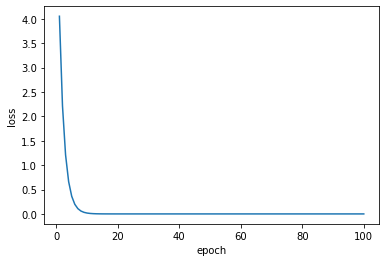

In [31]:
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()